In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
hdf=pd.read_csv("HeartData.csv")
hdf

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exange,olpeak,slope,ca,tha,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


In [4]:
hdf1=hdf.drop(['sex','cp','fbs','restecg','exange','slope','ca','tha','target'],axis=1)
hdf1

,age,trestbps,chol,thalach,olpeak
0,63,145,233,150,2.3
1,67,160,286,108,1.5
2,67,120,229,129,2.6
3,37,130,250,187,3.5
4,41,130,204,172,1.4
...,...,...,...,...,...
298,45,110,264,132,1.2
299,68,144,193,141,3.4
300,57,130,131,115,1.2
301,57,130,236,174,0.0


In [16]:
k=pd.DataFrame(hdf1.describe())
k

,age,trestbps,chol,thalach,olpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,131.689769,246.693069,149.607261,1.039604
std,9.038662,17.599748,51.776918,22.875003,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,48.000000,120.000000,211.000000,133.500000,0.000000
50%,56.000000,130.000000,241.000000,153.000000,0.800000
75%,61.000000,140.000000,275.000000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


## Correlation Matrix

In [5]:
# Correlation Matrix
corrMatrix=hdf1.corr()
corrMatrix

,age,trestbps,chol,thalach,olpeak
age,1.000000,0.284946,0.208950,-0.393806,0.203805
trestbps,0.284946,1.000000,0.130120,-0.045351,0.189171
chol,0.208950,0.130120,1.000000,-0.003432,0.046564
thalach,-0.393806,-0.045351,-0.003432,1.000000,-0.343085
olpeak,0.203805,0.189171,0.046564,-0.343085,1.000000


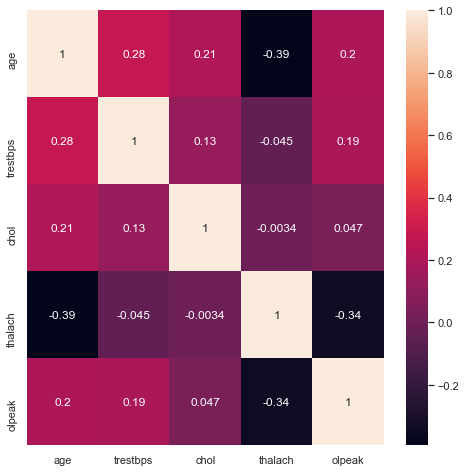

In [6]:
# Correlation Heatmap Matrix
sns.set(rc={'figure.figsize':(8,8)})
sns.heatmap(corrMatrix,annot=True)
plt.show()

From this plot we can see that there is moderate correlation between different pairs of variables. Also, 'age' and 'thalach' has moderate correlation which is near about -0.4. Here we can also conclude that the assumption about independence of predictors is violated.

## Chi-Square test for association

In [7]:
# Contingency Table of slope and thal
contTable=pd.crosstab(index=hdf['slope'],columns=hdf['tha'])
contTable

tha,3,6,7
slope,,,
1,103,2,37
2,56,14,70
3,8,3,10


In [8]:
# Chi-square test for independence of slope and thal
import scipy.stats as st
st.chi2_contingency(contTable)

(36.27598372064132,
 2.5390227240426463e-07,
 4,
 array([[78.2640264 ,  8.90429043, 54.83168317],
        [77.16171617,  8.77887789, 54.05940594],
        [11.57425743,  1.31683168,  8.10891089]]))

In [9]:
# Pvalue<0.05: Reject Ho i.e. There is association between slope and thal

In [10]:
contTable1=pd.crosstab(index=hdf['sex'],columns=hdf['cp'])
contTable1

cp,1,2,3,4
sex,,,,
0,4,18,35,40
1,19,32,51,104


In [11]:
# Chi-square test for independence of sex and cp
#st.chi2_contingency(contTable1)

In [12]:
contTable2=pd.crosstab(index=hdf['restecg'],columns=hdf['exange'])
contTable2

exange,0,1
restecg,,
0,108,43
1,2,2
2,94,54


In [13]:
# Chi-square test for independence of restecg and exang
st.chi2_contingency(contTable2)

(2.733000468684148,
 0.2549978323770305,
 2,
 array([[101.66336634,  49.33663366],
        [  2.69306931,   1.30693069],
        [ 99.64356436,  48.35643564]]))

## Logistics Regression Model

In [14]:
hdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exange    303 non-null    int64  
 9   olpeak    303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  tha       303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [15]:
#def clean_dataset(hdf):
 #   assert isinstance(hdf, pd.DataFrame)
 #   hdf.dropna(inplace=True)
  #  indices_to_keep = ~hdf.isin([np.nan, np.inf, -np.inf]).any(1)
  #  return hdf[indices_to_keep].astype(np.int64)

In [16]:
x=hdf.iloc[:,:-1]
y=hdf.iloc[:,-1]
x,y

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exange  olpeak  \
 0     63    1   1       145   233    1        2      150       0     2.3   
 1     67    1   4       160   286    0        2      108       1     1.5   
 2     67    1   4       120   229    0        2      129       1     2.6   
 3     37    1   3       130   250    0        0      187       0     3.5   
 4     41    0   2       130   204    0        2      172       0     1.4   
 ..   ...  ...  ..       ...   ...  ...      ...      ...     ...     ...   
 298   45    1   1       110   264    0        0      132       0     1.2   
 299   68    1   4       144   193    1        0      141       0     3.4   
 300   57    1   4       130   131    0        0      115       1     1.2   
 301   57    0   2       130   236    0        2      174       0     0.0   
 302   38    1   3       138   175    0        0      173       0     0.0   
 
      slope  ca  tha  
 0        3   0    6  
 1        2   3    3  
 2   

In [17]:
# Splitting of dataset as training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)
x_train


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exange,olpeak,slope,ca,tha
20,64,1,1,110,211,0,2,144,1,1.8,2,0,3
113,43,0,4,132,341,1,2,136,1,3.0,2,0,7
77,51,0,3,140,308,0,2,142,0,1.5,1,1,3
197,45,0,4,138,236,0,2,152,1,0.2,2,0,3
89,51,0,3,130,256,0,2,149,0,0.5,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,52,1,2,128,205,1,0,184,0,0.0,1,0,3
17,54,1,4,140,239,0,0,160,0,1.2,1,0,3
110,61,0,4,145,307,0,2,146,1,1.0,2,0,7
134,43,0,3,122,213,0,0,165,0,0.2,2,0,3


In [34]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(x_train)
X_test=scaler.transform(x_test)
X_test

array([[ 5.95237293e-01, -1.47790748e+00,  8.47033653e-01,
         1.02059760e+00,  1.46130608e-01, -4.11195970e-01,
         1.01042340e+00,  3.41340903e-01, -7.09299366e-01,
         1.36694727e+00,  6.49662017e-01,  1.45036507e+00,
         1.18330695e+00],
       [-2.79102160e-01,  6.76632341e-01, -1.24462088e+00,
         1.12983014e-01, -9.18700670e-01, -4.11195970e-01,
        -1.00210716e+00,  3.83942501e-01, -7.09299366e-01,
        -2.18362184e-01, -9.71144252e-01,  3.67067703e-01,
        -8.84276312e-01],
       [-1.48131891e+00,  6.76632341e-01, -1.24462088e+00,
        -6.81179751e-01, -1.74067569e+00, -4.11195970e-01,
        -1.00210716e+00,  1.40638085e+00, -7.09299366e-01,
        -9.22944165e-01, -9.71144252e-01, -7.16229664e-01,
        -8.84276312e-01],
       [ 1.36028431e+00, -1.47790748e+00,  8.47033653e-01,
        -1.47534252e+00, -5.07713159e-01, -4.11195970e-01,
        -1.00210716e+00, -2.97683067e-01, -7.09299366e-01,
        -6.58725922e-01, -9.71144252e

In [35]:
# Model on training dataset
from sklearn.linear_model import LogisticRegression
LRModel=LogisticRegression()

LRModel.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
LRModel

LogisticRegression()

In [37]:
LRModel.intercept_

array([-0.13180678])

In [38]:
beta=LRModel.coef_
beta=beta.flatten()
beta

array([-4.97577646e-02,  6.41652284e-01,  4.38220895e-01,  1.63312802e-02,
        5.98710408e-04, -8.99257262e-02,  2.54835749e-01, -3.32314460e-02,
        8.53667405e-01,  2.06980631e-01,  1.80166805e-01,  1.29051691e+00,
        3.91163576e-01])

In [39]:
# Predicted values
y_pred=LRModel.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1], dtype=int64)

In [40]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test,y_pred)

array([[32,  5],
       [ 5, 19]], dtype=int64)

In [41]:
accuracy_score(y_test,y_pred)

0.8360655737704918

## VIF

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [43]:
X=hdf.iloc[:,:-1]
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exange,olpeak,slope,ca,tha
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3


In [44]:
vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(X.values,i)for i in range(len(X.columns))]
print(vif)

          VIF
0   42.308560
1    3.878523
2   13.611297
3   60.709700
4   26.359795
5    1.248271
6    2.152922
7   34.642028
8    2.055552
9    3.100727
10  11.753248
11   2.024982
12  10.665033


Here, VIF values for age, cp, trestbps, chol, restecg, olpeak and ca are greater than 5, we conclude that there is presence of multicollinearity in the given data.

## PCA

In [45]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_stan=scaler.fit_transform(X)
x_stan

array([[ 0.94872647,  0.68620244, -2.25177456, ...,  2.27457861,
        -0.72842926,  0.65528247],
       [ 1.39200191,  0.68620244,  0.87798549, ...,  0.64911323,
         2.48585324, -0.895894  ],
       [ 1.39200191,  0.68620244,  0.87798549, ...,  0.64911323,
         1.41442574,  1.17234129],
       ...,
       [ 0.28381332,  0.68620244,  0.87798549, ...,  0.64911323,
         0.34299824,  1.17234129],
       [ 0.28381332, -1.4572959 , -1.20852121, ...,  0.64911323,
         0.34299824, -0.895894  ],
       [-1.82174501,  0.68620244, -0.16526786, ..., -0.97635214,
         0.34299824, -0.895894  ]])

In [46]:
from sklearn.decomposition import PCA
pca=PCA(n_components=13)
X_pca=pca.fit_transform(x_stan)
explained_variance=pca.explained_variance_ratio_
print(explained_variance)
Xpca=pd.DataFrame(X_pca)
Xpca


[0.23649191 0.12299629 0.09571867 0.08459665 0.07601373 0.06785314
 0.06625773 0.05977921 0.05280761 0.04315682 0.03499762 0.03177738
 0.02755325]


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.166745,0.952144,3.087229,2.403715,-0.121293,0.031344,0.979387,0.622356,-1.488823,-0.459357,-0.221343,-0.471248,0.128278
1,3.190782,1.460879,-0.436539,-0.891345,0.142445,-0.770547,0.281224,-1.054736,0.422592,1.472191,1.033516,0.960517,1.029697
2,3.133634,-0.627956,-0.347446,-0.600455,-0.042932,-1.115737,0.495478,-0.170099,0.047138,0.453506,-0.342794,-0.920889,-0.201756
3,-0.463230,-1.388901,0.257402,2.857784,-0.780945,-0.041468,-0.760007,2.113241,0.895477,0.216910,1.536679,-0.169559,0.567354
4,-2.282119,0.383244,-0.122726,1.202794,-0.800699,-0.258334,0.673586,-0.031292,1.056596,0.576542,-0.853539,0.203072,-1.154884
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,-0.676201,-1.465368,0.578418,1.172215,0.243073,-0.844850,-0.840767,0.928594,-2.048618,-0.127868,-0.923385,1.012585,-0.343748
299,2.621644,0.040244,2.182901,-0.059692,2.141270,0.382190,0.155629,1.003242,0.880612,-0.792094,0.723790,-0.705497,-0.733137
300,1.885179,-2.371744,-0.171360,-0.017140,1.476962,0.420695,0.265698,-1.315964,0.239335,0.151753,-0.514436,-0.038227,0.287062
301,-1.334783,1.506632,-0.156484,0.875433,-0.142806,-0.832332,0.716529,0.116531,0.355273,0.277818,-1.100542,-0.409413,1.015974


In [47]:
from sklearn.model_selection import train_test_split
x_trainp,x_testp,y_trainp,y_testp=train_test_split(Xpca,y,test_size=0.20)
x_trainp


,0,1,2,3,4,5,6,7,8,9,10,11,12
157,0.120064,0.414899,0.266708,-2.347856,-0.973967,-1.329511,-0.524490,0.381582,0.532437,-0.859234,-0.421667,-0.269016,0.361117
255,-2.253221,-0.493445,-0.936085,1.146890,0.465743,0.651260,0.216652,0.731796,0.680839,-0.229442,-0.548886,0.073246,0.853527
287,0.265970,-0.693649,1.009637,-0.171170,1.391767,-1.352343,-0.763777,0.349023,-0.468808,-0.025999,-1.010861,0.359940,0.932539
33,0.109138,-0.896583,0.235980,0.013602,0.350648,0.169498,-1.091447,-0.252084,-0.023370,-1.652582,0.186629,-0.658515,0.748307
293,2.769050,-0.660232,0.429782,-0.613169,-0.167738,-0.876300,-0.089734,-0.794631,1.536113,1.070213,-0.057144,-1.078393,-1.762900
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,-0.526652,3.321453,-0.835418,0.018437,-0.921666,0.103472,-0.878853,-0.763303,-0.262204,-0.397771,0.390764,0.138900,-0.571051
273,0.146908,-0.132653,-1.707499,1.188787,2.681672,-0.155155,1.160010,-0.630599,0.104181,-0.960479,0.219712,-1.217631,-0.319393
83,2.396995,1.559527,2.498009,0.258729,-1.009008,2.055097,-0.153303,-1.112039,-0.657119,-0.097287,0.184670,-0.721955,-0.019267
107,0.447683,-0.345896,0.682451,-0.118117,-0.472961,-1.232898,0.205148,-0.286206,-0.123197,-0.984592,-0.770944,-0.026689,0.635879


In [48]:
# Model on training dataset
from sklearn.linear_model import LogisticRegression
LRModelp=LogisticRegression()

LRModelp.fit(x_trainp,y_trainp)

LogisticRegression()

In [49]:
LRModelp.intercept_

array([-0.15108649])

In [50]:
LRModel.coef_

array([[-4.97577646e-02,  6.41652284e-01,  4.38220895e-01,
         1.63312802e-02,  5.98710408e-04, -8.99257262e-02,
         2.54835749e-01, -3.32314460e-02,  8.53667405e-01,
         2.06980631e-01,  1.80166805e-01,  1.29051691e+00,
         3.91163576e-01]])

In [51]:
y_predp=LRModelp.predict(x_testp)
y_predp

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1], dtype=int64)

In [52]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_testp,y_predp)

array([[33,  2],
       [ 5, 21]], dtype=int64)

In [53]:
accuracy_score(y_testp,y_predp)

0.8852459016393442

## Scree Plot

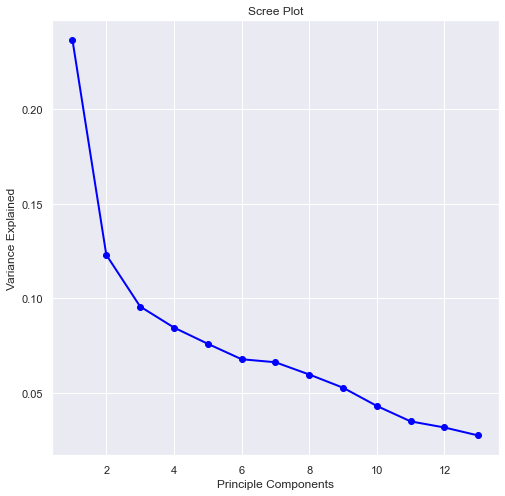

In [54]:
PCA=[1,2,3,4,5,6,7,8,9,10,11,12,13]
plt.plot(PCA,explained_variance,'o-',linewidth=2,color='blue')
plt.title('Scree Plot')
plt.xlabel('Principle Components')
plt.ylabel('Variance Explained')
plt.show()

## Ridge Regression

In [55]:
# estimate of sigma^2
residual=y_test-y_pred
res_sum_squares=residual.T@residual
mse=res_sum_squares/(303-14)
mse

0.03460207612456748

In [56]:
# biasing parameter in ridge estimator
c=mse*13/(beta.T@beta)
c

0.1361823609354743

In [57]:
from sklearn.linear_model import LogisticRegression
LRModelR=LogisticRegression(C=0.15,penalty='l2')

LRModelR.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.15)

In [58]:
LRModelR.intercept_

array([-0.0569948])

In [59]:
LRModelR.coef_

array([[-3.47203050e-02,  3.82872574e-01,  3.85393565e-01,
         1.35484846e-02,  2.65263419e-04, -8.40236088e-03,
         2.51187751e-01, -3.15795377e-02,  4.85246441e-01,
         2.26490738e-01,  1.14701492e-01,  9.39558029e-01,
         3.96165384e-01]])

In [60]:
y_predR=LRModelR.predict(x_test)
y_predR

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [61]:
accuracy_score(y_test,y_predR)

0.8688524590163934

Text(0.5, 1.0, 'Accuracy Score using different techniques')

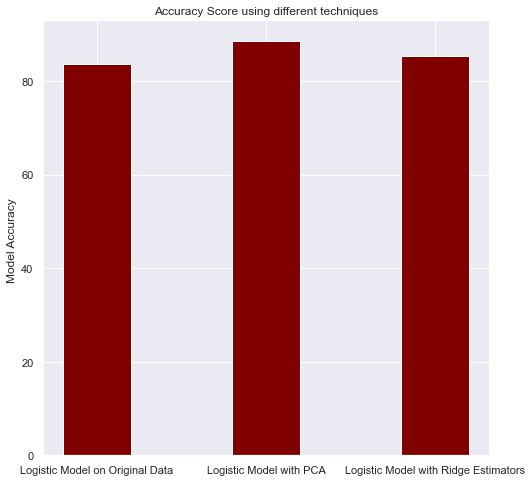

In [184]:
# Accuracy Plot
Acc_Score=[accuracy_score(y_test,y_pred)*100,accuracy_score(y_testp,y_predp)*100,accuracy_score(y_test,y_predR)*100]
Models=['Logistic Model on Original Data','Logistic Model with PCA','Logistic Model with Ridge Estimators']
plt.bar(Models,Acc_Score,color='maroon',width=0.4)
plt.ylabel("Model Accuracy ")
plt.title("Accuracy Score using different techniques")